# Проект по изучению продаж игр на различных платформах для прогнозирования работы на 2017 год интернет магазина "Стримчик"

# Описание проекта 

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года. В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

<div class="alert alert-warning", style="border:solid coral 3px; padding: 20px">
<font size="4", color = "DimGrey"><b>⚠️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Краткое вступление в работу и главная задача зафиксированы. 
       
        
Четкий план работ и перечень основных задач позволит коллегам быстрее вникнуть в суть проекта, + будет легче  идти к главной цели проекта

### Изучение общей информации

In [1]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('/datasets/games.csv', sep = ',')
df.info()
#Посмотрим общую информацию о типе данных и количесте пропусков

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
df.isna().sum()
#количество пропусков

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

<div style="border:solid steelblue 3px; padding: 20px">
<font size="4">🍕<b> Комментарий ревьюера </b></font>
<br /> 
<font size="3", color = "black">
<br />   Кажется весь код на проекте запускался вручную ... 346-я строка кода в начале проекта
    
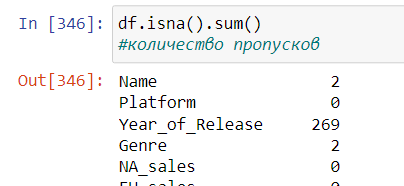    
    
    
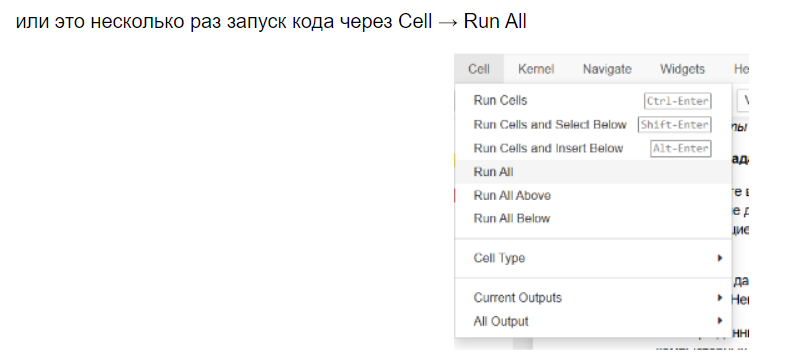    
    
   
    
Проверить работоспособность кода — можно нажав на панели Jupiter Hub Kernel и Restart & Run All (см скриншот ниже).

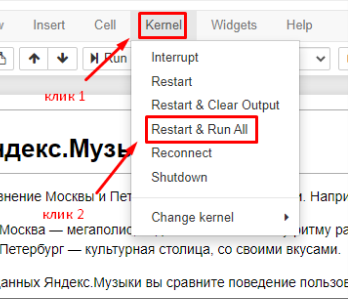

In [4]:
pd.set_option('display.max_columns', None)
df.head(10)
#Посмотрим первые 10 строк

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [5]:
df.describe()
#просмотр распределения значений

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


#### Вывод изучение общей информации


Необходимо заменить типы данных в следующих столбцах:  

1. Year_of_Release - на int64, потому что год не может быть дробным.

2. User_Score - на float64, потому что это должно быть численное значение с дробной частью.

3. Critic_Score - на int64, потому что значения целые.

Так же видим большое количество пропусков в столбцах Critic_Score, User_Score, Rating.  
Медианы продаж сильно отличаются от максимумов.

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> загрузка и обзор данных проведены корректно

<div class="alert alert-warning", style="border:solid coral 3px; padding: 20px">
<font size="4"><b>⚠️ Комментарий ревьюера</b></font>
    <br />  
    <font size="3", color = "black">
<br /> не помешает добавить вывод после первого знакомства с данными

<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Вывод добавлен
        
        

### Предобработка данных

#### Переименование столбцов

In [6]:
df = df.rename(columns = {
    'Year_of_Release':'year_of_release', 'NA_sales':'na_sales',
    'EU_sales':'eu_sales', 'JP_sales':'jp_sales',
    'Name':'name', 'Platform':'platform',
    'Other_sales':'other_sales','Critic_Score':'critic_score', 
    'User_Score':'user_score', 'Rating':'rating', 'Genre':'genre'
})

<div style="border:solid steelblue 3px; padding: 20px">
<font size="4">🍕<b> Комментарий ревьюера</b></font>
<br /> 
<font size="3", color = "black">
<br />можно

    games.columns = games.columns.str.lower()

#### Преобразование типов данных

In [7]:
df['year_of_release'] = df['year_of_release'].astype('Int64')
df['critic_score'] = df['critic_score'].astype('Int64')
#Чтобы преоборазовать данные в столбце user_score необходимо заменить значение tbd на Nan
#т.к это обычные пропуски значений
df['user_score'] = df['user_score'].replace('tbd', np.NaN)
df['user_score'] = df['user_score'].astype(float)

TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято.  
По сути эти значения являются обычным пропуском.

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />
Верно, по своей сути tbd и является Nan. Отлично, что определяешь неявные пропущенные значения.

#### Замена пропусков

In [8]:
# check
# пропущенные значения бары

def pass_value_barh(dfg):
    try:
        (
            (dfg.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) или произошла ошибка в первой части функции ')

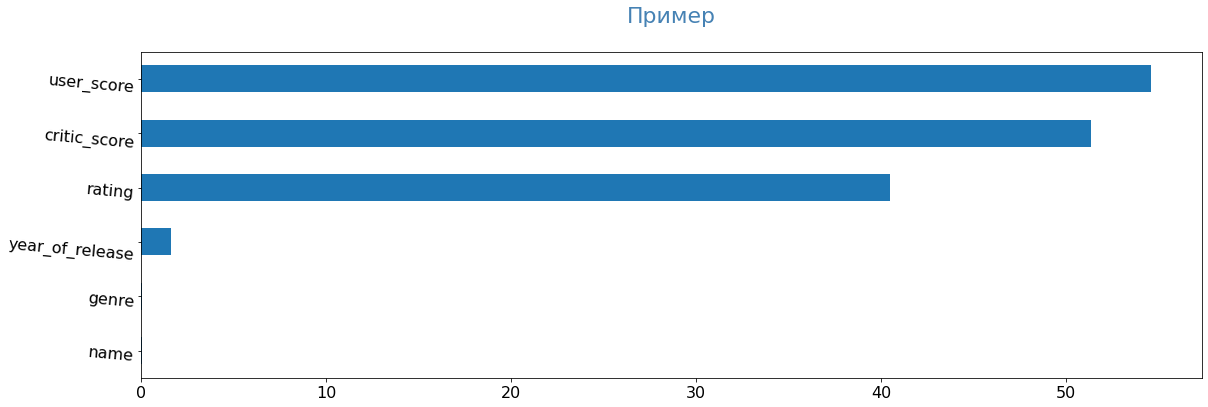

In [9]:
pass_value_barh(df)

<div style="border:solid steelblue 3px; padding: 20px">
<font size="4">🍕<b> Комментарий ревьюера</b></font>
<br /> 
<font size="3", color = "black">
<br /> Наглядность представления информации одна из важных составляющих работы дата-аналитика или дата-сайентиста
    
__мой график оформлен не совсем корректно, сможешь отметить, что стоило бы исправить в графике?__
  

<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Необходимо подписать график, подписать оси графика, чтобы тому, кто будет изучать работу, было понятнее, что иозображено на графике!
        

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера в2</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Принимается 
        
За поворот текста отвечает параметр rot, можно добавить обозначение оси х (процент записей с пропусками)
        
        df.isna().mean()*100 — для расчета процента пропусков в колонке
        
На графике мы оцениваем масштаб проблемы с пропусками и возможное совпадение % пропущенных значений в колонках
        
добавить подписи к осям мешает строка кода
        
        .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')    
        
её можно заменить на        
        
        plt.title('Пропущенные значения, %' + "\n", fontsize=22, color='SteelBlue')
        plt.xlabel('Процент пропусков', fontsize=22)
        plt.ylabel('Столбцы с пропусками')

плюс можно установить шкалу от 0 до 100       
        
        plt.xlim(0, 100)        

In [10]:
df = df.dropna(subset=['name','year_of_release'])

Удалить эти строки полностью мы можем, потому что они не повлияют на общие данные, т.к их немного.  
После этого пропуски остались в столбцах user_score, critic_score, rating.

<div class="alert alert-warning", style="border:solid coral 3px; padding: 20px">
<font size="4", color = "DimGrey"><b>⚠️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Решение верное, перед удалением стоит посмотреть на записи — может они по 100 млн. продаж принесли ...
        
На этом проекте мы работаем с продажами, поэтому включается другой фактор, кроме процента потерь ...        

In [11]:
df['sum_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
#Создадим столбец суммарных продаж

<div style="border:solid steelblue 3px; padding: 20px">
<font size="4">🍕<b> Комментарий ревьюера</b></font>
<br /> 
<font size="3", color = "black">
<br />
можно
    
    df['total_sales'] = df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

#### Вывод по предобработке

1. Наименования столбцов были приведены к одному регистру;  
2. Изменены типы данных в столбцах year_of_release, critic_score, user_score;
3. Удалены строки с пропусками в столбцах name, year_of_release;  
Количество удаленных данных 16444/16713*100% = 1.6%, что является не критичным для всего набора данных.  
4. Значения tbd в столбце user_score заменено на "маркер";  
5. Добавлен новый столбец с суммарными продажами каждой игры.  



Пропуски в столбцах user_score, critic_score, rating нельзя просто удалить, потому что данных очень много, так же нельзя и заменить средним или медианным значением.
Даже при группировки по жанру, средняя/медианная оценка пользователей не будет достоверной, так же как и оценки критиков.  
Оставим эти данные как есть.

<div class="alert alert-warning", style="border:solid coral 3px; padding: 20px">
<font size="4", color = "DimGrey"><b>⚠️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />   
Как думаешь, почему могли возникнуть все эти пропуски?
    

<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Пропуски в столбце year_of_release могли возникнуть, возможно, из-за того, что неизвестна дата релиза игры на определенную платформу или релиз игры был давно, поэтому не внесено в данные.  
        Пропуски в столбцах продаж в разных странах могли возникнуть, потому что игры выпускалась только в определенной стране, из-за возрастного ограничения игра в Японии,например, могла не закупаться вообще, так же возможно разные платформы используются в разных странах, а для каждой консоли свои игры.
        
        

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера в2</b></font>
    <br /> 
    <font size="3", color = "black">
<br />плюс технические проблемы и отсутствие ресурсов на сбор информации (время, деньги)

<div class="alert alert-warning", style="border:solid coral 3px; padding: 20px">
<font size="4", color = "DimGrey"><b>⚠️ Комментарий ревьюера </b></font>
    <br /> 
    <font size="3", color = "black">
<br />          
Рейтинг ESRB — категориальные данные, стоит внимательно взглянуть на содержимое и предложить чем заполнить пропуски, возможно это поможет найти необычные различия в поведении клиентов, допом можно подумать над сокращением количества категорий
        
Т.к. записи с пропусками не учитываются при группировке данных, мы не сможем выявить реальный портрет клиента

<div class="alert alert-d anger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />
Датасет не проверен на наличие простых дубликатов
        
__Особенно это станет важным, когда мы перейдем к более сложным задачам на втором модуле курса__

__Поиск явных дубликатов__

In [12]:
df['name'] = df['name'].str.lower()
df['genre'] = df['genre'].str.lower()

In [13]:
df['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [14]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [15]:
df['genre'].unique()

array(['sports', 'platform', 'racing', 'role-playing', 'puzzle', 'misc',
       'shooter', 'simulation', 'action', 'fighting', 'adventure',
       'strategy'], dtype=object)

__Поиск неявных дубликатов__

In [16]:
df[df.duplicated(['name', 'platform'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
1591,need for speed: most wanted,X360,2005,racing,1.0,0.13,0.02,0.10,83,8.5,T,1.25
11715,need for speed: most wanted,PC,2012,racing,0.0,0.06,0.00,0.02,82,8.5,T,0.08
16230,madden nfl 13,PS3,2012,sports,0.0,0.01,0.00,0.00,83,5.5,E,0.01


In [17]:
df[df.duplicated(['name', 'year_of_release', 'platform'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
16230,madden nfl 13,PS3,2012,sports,0.0,0.01,0.0,0.0,83,5.5,E,0.01


In [18]:
df.query('name=="need for speed: most wanted"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
253,need for speed: most wanted,PS2,2005,racing,2.03,1.79,0.08,0.47,82,9.1,T,4.37
523,need for speed: most wanted,PS3,2012,racing,0.71,1.46,0.06,0.58,<NA>,NaN,NaN,2.81
1190,need for speed: most wanted,X360,2012,racing,0.62,0.78,0.01,0.15,83,8.5,T,1.56
1591,need for speed: most wanted,X360,2005,racing,1.00,0.13,0.02,0.10,83,8.5,T,1.25
1998,need for speed: most wanted,XB,2005,racing,0.53,0.46,0.00,0.05,83,8.8,T,1.04
2048,need for speed: most wanted,PSV,2012,racing,0.33,0.45,0.01,0.22,<NA>,NaN,NaN,1.01
3581,need for speed: most wanted,GC,2005,racing,0.43,0.11,0.00,0.02,80,9.1,T,0.56
5972,need for speed: most wanted,PC,2005,racing,0.02,0.23,0.00,0.04,82,8.5,T,0.29
6273,need for speed: most wanted,WiiU,2013,racing,0.13,0.12,0.00,0.02,<NA>,NaN,NaN,0.27
6410,need for speed: most wanted,DS,2005,racing,0.24,0.01,0.00,0.02,45,6.1,E,0.27


Может показаться, что это дубликаты, но это две разные версии игры, выпущенные в разные года.

In [19]:
df.query('name=="madden nfl 13"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
507,madden nfl 13,X360,2012,sports,2.53,0.15,0.0,0.17,81,5.8,E,2.85
604,madden nfl 13,PS3,2012,sports,2.11,0.22,0.0,0.23,83,5.5,E,2.56
3986,madden nfl 13,Wii,2012,sports,0.47,0.00,0.0,0.03,<NA>,7.3,E,0.50
5887,madden nfl 13,PSV,2012,sports,0.28,0.00,0.0,0.02,63,7.3,E,0.30
7066,madden nfl 13,WiiU,2012,sports,0.21,0.00,0.0,0.02,75,6.7,E,0.23
16230,madden nfl 13,PS3,2012,sports,0.00,0.01,0.0,0.00,83,5.5,E,0.01


А вот и он два раза на одной платформе с одним мименем и в один год

In [20]:
df = df.drop(index=16230)

<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Дубликат удален!

<div class="alert alert-da nger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />   
На рабочих проектах стоит искать дубликаты по ключевым столбцам, для примера по сумме параметров: 
   
    ['name', 'platform', 'year_of_release']
    
С обязательным приведением содержимого категориальных колонок к нижнему регистру
        
В сырой выборке имеется 2 строчки неполных дубликатов
        
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html?highlight=duplicat#pandas.DataFrame.duplicated

<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Явных дубликатов в столбцах с категорийными данными обнаружено не были.
        
        

<div class="alert alert-dan ger">
<font size="4"><b>❌ Комментарий ревьюера в2</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Стоит прочитать справки и найти дубликаты
        
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html?highlight=duplicat#pandas.DataFrame.duplicated
        
https://www.codecamp.ru/blog/pandas-find-duplicates/        

### Исследовательский анализ данных

#### Распределение выпуска всех игр по годам

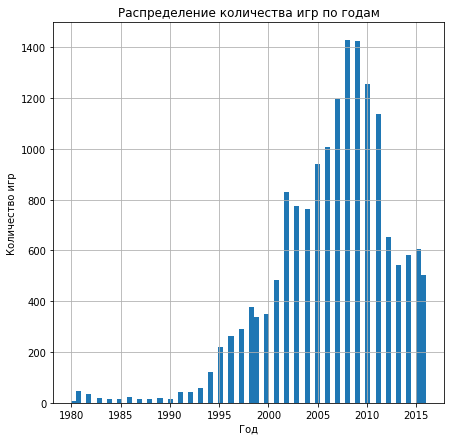

In [21]:
df['year_of_release'].plot(kind ='hist', grid=True, bins=70, figsize=(7, 7))
plt.title('Распределение количества игр по годам')
plt.xlabel('Год')
plt.ylabel('Количество игр')
plt.show()

По общему распределению можно явно увидеть, что количество игр с каждый годом выпускалось все больше.  
Я считаю, что при планировании закупок/продаж на 2017 год, не важны все данные.  
Одна из причин то, что данные с 1980 года, тогда игровые платформы были совсем другие нежели сейчас.  
Далее наглядно посмотрим это 

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Все элементы оформления (надписи у графика) добавлены, молодец

<div class="alert alert-da nger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />          
стоит изменить параметры отображения гистограммы, сейчас может показаться, что в 2004 году произошел резкий рост кол-ва игр

<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Количество "корзин" увеличино, чтобы данные более явно можно было оценить по годам.

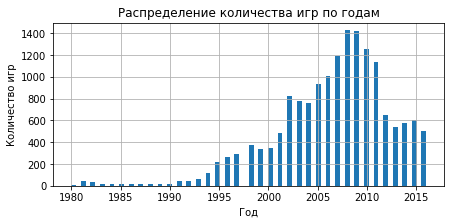

In [22]:
df['year_of_release'].plot(kind ='hist', grid=True, bins=74, figsize=(7, 3))
plt.title('Распределение количества игр по годам')
plt.xlabel('Год')
plt.ylabel('Количество игр')
plt.show()

#### Распределение продаж по платформам 

Найдем платформы с наибольшим количеством продаж

In [23]:
(
    df.pivot_table(index='platform', values='sum_sales', aggfunc='sum')
    .sort_values(by='sum_sales', ascending=False).head(10)
)

,sum_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.33
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


In [24]:
df = df.query('year_of_release != 1985')

Построим график распределения этих платформ по годам

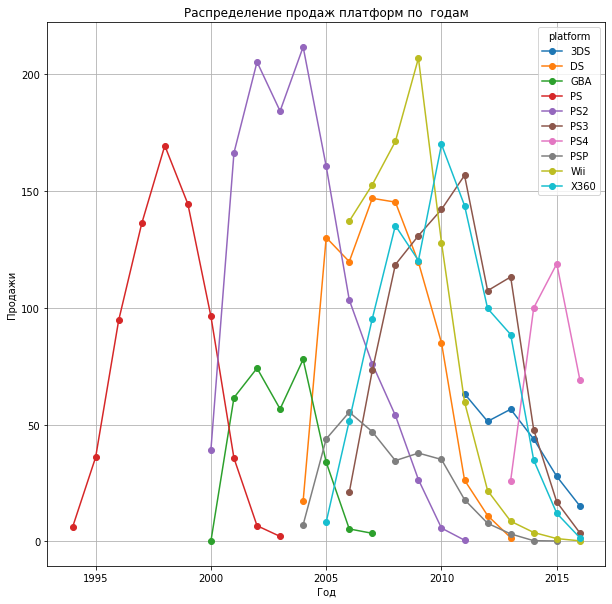

In [25]:
df_top10_platform = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS']
(
    df.query('platform == @df_top10_platform')
    .pivot_table(index='year_of_release', columns='platform', values='sum_sales', aggfunc='sum')
    .plot(grid=True, style='o-', figsize=(10, 10))
)
plt.title('Распределение продаж платформ по  годам')
plt.xlabel('Год')
plt.ylabel('Продажи')
plt.show()

Для рассмотрения я взял 10 самых популярных платформ по продажам.  
Чтобы расчитать "срок жизни" платформы, возьмем как пример PS, DS, PS2.  
Продажи PS распределены с 1994 по 2003, "срок жизни" равен 9 лет.  
Продажи DS распределены с 2004 по 2013, "срок жизни" равен 9 лет.  
Продажи PS2 распределены с 2000 по 2011, "срок жизни" равен 11 лет.  
Можно сделать вывод, что "срок жизни" платформы 10 лет в среднем, соответсвенно необходимо рассмотреть платформы, у которых еще не прошло 10 лет с момента появления первых продаж.  
В соответсвии с этим актуальным периодом буду считать с 2006 по 2016, так же это период был выбран из-за набора популярности платформ - X360, PSP, DS, PS3, Wii. 
Далее этот период будет использоваться для прогноза на 2017 год как актуальный. 


<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Отличное определение жизненного цикла продаж у платформ, молодец

<div class="alert alert-dan ger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />
Странный выброс 1985 года у DS, можно посмотреть когда платформу выпустили на рынок, стоит удалить аномалию  

<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> В момент построения графика увидел этот выброс на графике, но не придал значение, спасибо за то, что обратил внимание!  
        Добавил строку удаления выброса, так же перестроил график!

In [26]:
df_actual_period = df.query('year_of_release > 2013')
df_actual_period.reset_index(drop= True , inplace= True )

<div class="alert alert-dan ger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Для целей прогнозирования продаж на следующий год даже в традиционных бизнесах редко берут данные более чем за 2-3 года. А в такой динамично меняющейся индустрии, как компьютерные игры и вовсе не стоит брать слишком большой временной интервал - иначе обязательно захватишь уже отжившие тренды. Но и слишком короткий период тоже брать не стоит
        
        df_actual_period = df.query('year_of_release > 2005')

<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Согласен, погорячился, возьмем 3 года, посмотри, как поменяются выводы

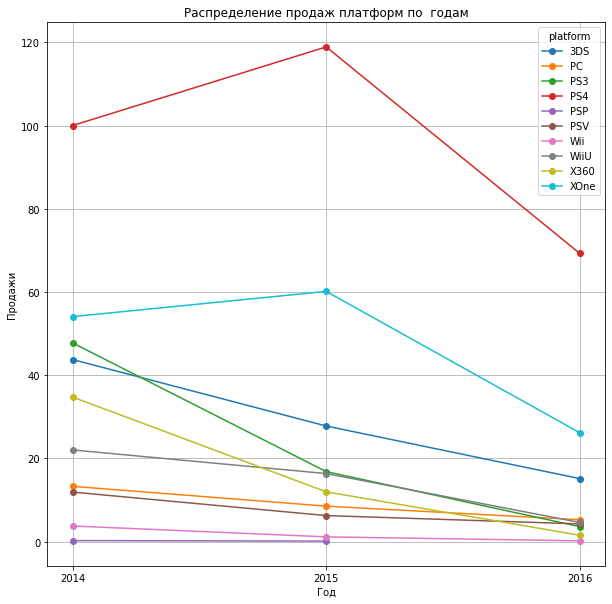

In [27]:
(
    df_actual_period.pivot_table(index='year_of_release', columns='platform', values='sum_sales', aggfunc='sum')
    .plot(grid=True, style='o-', figsize=(10, 10))
)
plt.xticks(np.arange(2014, 2017))
plt.title('Распределение продаж платформ по  годам')
plt.xlabel('Год')
plt.ylabel('Продажи')
plt.show()

<div class="alert alert-warning", style="border:solid coral 3px; padding: 20px">
<font size="4"><b>⚠️ Комментарий ревьюера в2</b></font>
    <br /> 
    <font size="3", color = "black">
<br />
        
Можно подправить подписи оси х, в виде целых 2014, 2015 ..., 
        
искать тему Ticks and ticklabels
        
https://matplotlib.org/stable/tutorials/text/text_intro.html
        
или
        
https://dev-gang.ru/article/izmenenie-czastoty-tikov-v-matplotlib-k5x1kznn39/?ysclid=lcp5si8pky848462627

<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Исправлено

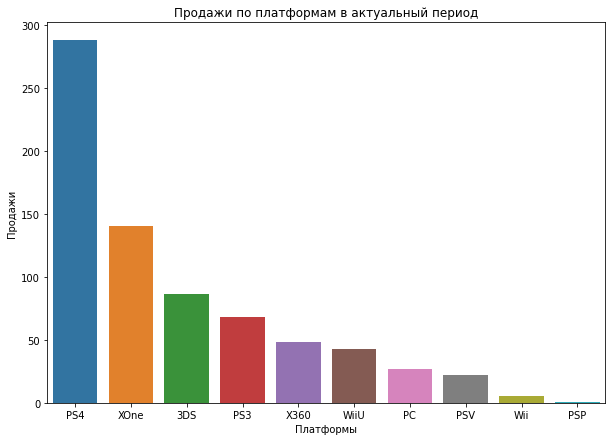

In [28]:
df_platform = df_actual_period.pivot_table(
    index='platform', values='sum_sales', aggfunc='sum').sort_values(by='sum_sales', ascending=False)

plt.figure(figsize=(10,7))
sns.barplot(x=df_platform.index,y=df_platform['sum_sales'])
plt.title('Продажи по платформам в актуальный период')
plt.xlabel('Платформы')
plt.ylabel('Продажи')
...;

<div style="border:solid steelblue 3px; padding: 20px">
<font size="4">🍕<b> Комментарий ревьюера</b></font>
<br /> 
<font size="3", color = "black">
<br />
Убрать служ. информацию поможет точка с запятой на посл. строке кода

    Text(0, 0.5, 'Продажи')
    
...;


Пересохраним нам датафрейм, оставив только актуальный период.  
Лидирую по продажам PS4, XOne, 3DS, PS3, X360.  
Из них DS, Wii уже прекращена поддержка официальная в 2013 и 2011 году соответсвенно, PS3 предыдущая версия консоли sony, как и X360 предыдущая версия microsoft.  
Потенциально растущие это PS4, XOne.  
Последние версии протативных приставок, нет более новых аналогов: 3DS, PSV.
Стационарный гейминг:  
- PS4 - это новая приставка от sony, которая точно будет актуальна ближайшие 8 лет, как видим по графику продажи начались только в 2013, так что можно смело делать ставку на неё.  
- XONE новая приставка от microsoft, предшественник X360 был одной из самых успешный приставок. XONE имеет обратную совместимость со всеми играми X360, поэтому игры двух приставок будут актуальны.  
  
Мобильный гейминг:  
- 3DS - новая протативная приставка от nintendo, как видно по графику приставка тоже не такая старая (2011 год), мобильный гейминг будет актуален все больше и больше, потому что у людей все меньше времени сидеть за стационарными устройствами, а поиграть хочется.  
- PSV - новая приставка Sony, протативная приставка, вторая версия ранее успешной PSP.  
  
  Так же нельзя забывать о PC всегда будет актуален, потому что у каждого дома есть ПК.  


<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Отличное определение перспективных платформ, молодец

<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Выборка значительно поменялась, приставки поменялись местами, теперь на первых местах новые приставки игровых гигантов, а старые приставки PS2, Wii вообще пропали из топа

#### Усатый график

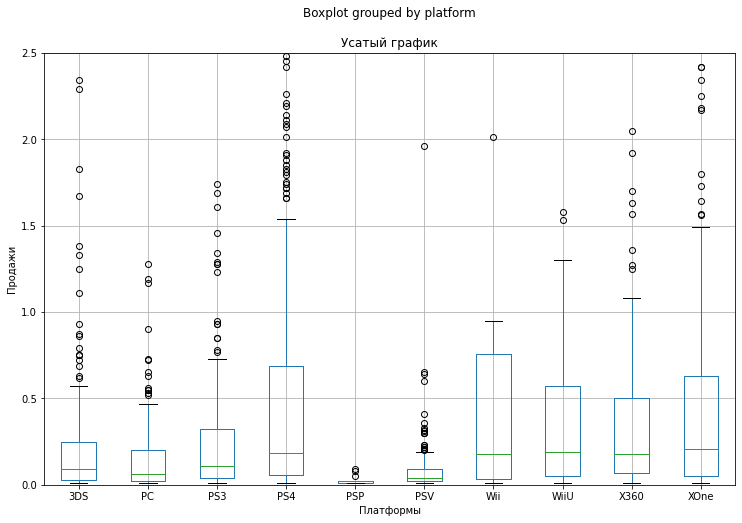

In [29]:
df_actual_period.boxplot(column = ['sum_sales'],by = ['platform'],figsize=(12, 8))
plt.ylim([0, 2.5])
plt.title('Усатый график')
plt.xlabel('Платформы')
plt.ylabel('Продажи')
plt.show()

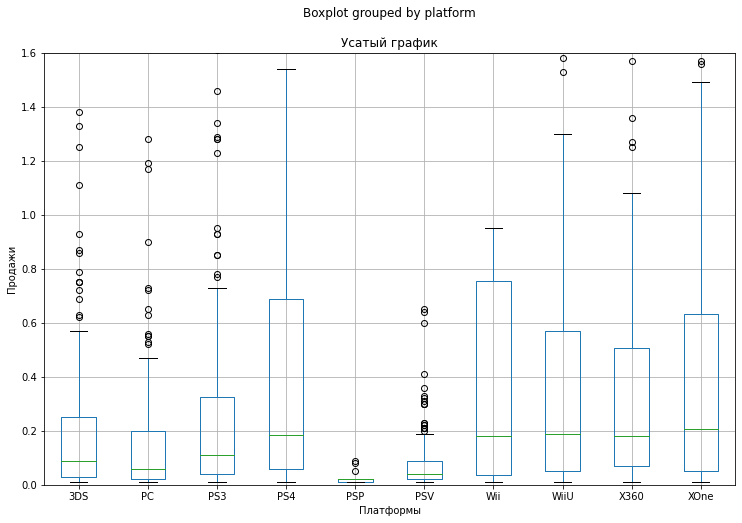

In [30]:
df_actual_period.boxplot(column = ['sum_sales'],by = ['platform'],figsize=(12, 8))
plt.ylim([0, 1.6])
plt.title('Усатый график')
plt.xlabel('Платформы')
plt.ylabel('Продажи')
plt.show()

In [31]:
df_actual_period.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,sum_sales
count,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000,718.000000,888.000000,1689.000000
mean,2014.953227,0.168182,0.160261,0.055115,0.048324,72.306407,6.623536,0.431883
std,0.799624,0.446134,0.466846,0.211513,0.141790,12.213500,1.589792,1.056109
min,2014.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.200000,0.010000
25%,2014.000000,0.000000,0.000000,0.000000,0.000000,66.000000,5.800000,0.030000
50%,2015.000000,0.020000,0.020000,0.010000,0.010000,74.000000,7.000000,0.100000
75%,2016.000000,0.120000,0.120000,0.040000,0.040000,81.000000,7.800000,0.350000
max,2016.000000,6.030000,6.310000,3.180000,2.380000,97.000000,9.300000,14.630000


Если сравнивать платформы по медианному значению продаж, то PS4, XOne, Wii, WiiU игры продаются большим тиражем стабильнее других, а медианные значения PSP, PSV, PC совсем низкие.

<b> Вывод</b></font>  
По графику видно платформы, у которых совсем мало продаж - PSP, PSV, но у PSV есть выбросы, одна игра как видно продалась очень даже хорошо.  
PS4 в последгие 3 года прямо сказать завоевала рынок консолей, 75% квантиль выше всех, количество выбросов(продоваемых тиражем выже 1.5 миллионов) очень много. В компании Sony поняли, что эксклюзивы повышают покупку не только их консолей, но и самих игр!
Так же 75% квантиль PC ниже чем у приставок, связано это с ценой игр и доступностью легко скачать игру, либо купить на одной из популярных платформ. Приставки серии Wii, WiiU имеют очень мало выбросов, как и ограниченное количество игр, потому что Nintendo редко взаимодействует с какими-то компаниями, которые производяти игры, они выпускают свои серии, которые хорошо продаются
У всех платформ кроме DC, XB, GBA, GC, WiiU видно большое количество выбросов, эти выбросы можно объяснить отдельными "эксклюзивами" для той или иной платформы, те игры, которые выстрелили и пользовались повышенным спросом.

<div class="alert alert-dan ger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Стоит поправить вывод после исправления выборки

<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Вывод исправлен

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера в2</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Что показывают нам две диаграммы размаха — кол-во выбросов, это игры, которые принесли максимум выручки. Т.е. можно платформы/жанры сравнить по кол-ву игр-рекордсменов, а значит определить, какая из них способна выпустить наиболее привлекательные для игроманов игры. Это про выбросы
        
Второй вид мы используем для того, чтобы сравнить медианные продажи по платформе/жанру, чтобы уточнить в каком кол-ве продаются игры на платформе/жанре, какая из них более стабильна в продажах...
        
        
Две хорошие статьи про диаграмму размаха
        
[Ящики, усы и скрипки](https://habr.com/ru/articles/533726/) 
        
[Исследуем отношение между переменными](https://dfedorov.spb.ru/pandas/downey/%D0%98%D1%81%D1%81%D0%BB%D0%B5%D0%B4%D1%83%D0%B5%D0%BC%20%D0%BE%D1%82%D0%BD%D0%BE%D1%88%D0%B5%D0%BD%D0%B8%D0%B5%20%D0%BC%D0%B5%D0%B6%D0%B4%D1%83%20%D0%BF%D0%B5%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D0%BC%D0%B8.html?)
       

#### Проверка зависимости отзывов

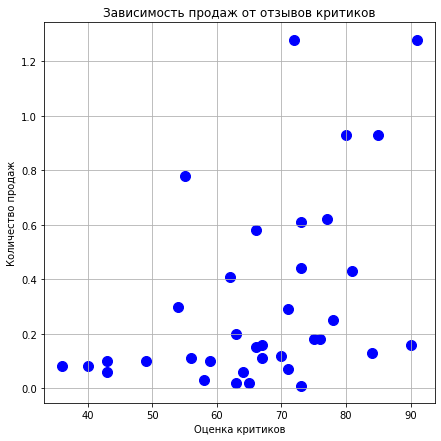

In [32]:
(
    df_actual_period.query('platform == "PS3"')
    .plot.scatter (x = 'critic_score', y = 'sum_sales', s= 100 , c='blue', figsize=(7, 7), grid=True)
)
plt.title('Зависимость продаж от отзывов критиков')
plt.xlabel('Оценка критиков')
plt.ylabel('Количество продаж')
plt.show()
...;

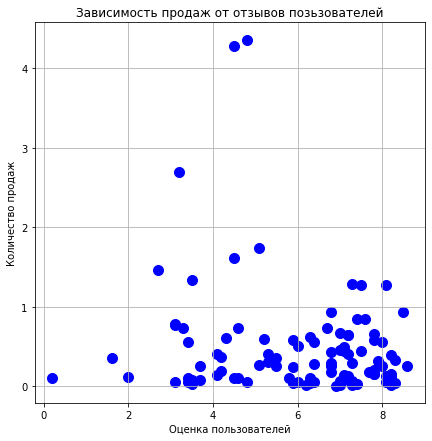

In [33]:
(
    df_actual_period.query('platform == "PS3"')
    .plot.scatter (x = 'user_score', y = 'sum_sales', s= 100 , c='blue', figsize=(7, 7), grid=True)
)
plt.title('Зависимость продаж от отзывов позьзователей')
plt.xlabel('Оценка пользователей')
plt.ylabel('Количество продаж')
plt.show()
...;

<div class="alert alert-dan ger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Стоит перерисовать диаграммы рассеяния без применения сводных таблиц
        
Можно попробовать настроить вид точечных графиков      
    
 [Как сделать диаграмму рассеяния из фрейма данных Pandas](https://www.codecamp.ru/blog/pandas-scatter-plot/?ysclid=lh0tbpkoa9628147030)
    
Примеры расчета коэф. корреляции и не только
        
[Исследуем отношение между переменными](https://dfedorov.spb.ru/pandas/downey/%D0%98%D1%81%D1%81%D0%BB%D0%B5%D0%B4%D1%83%D0%B5%D0%BC%20%D0%BE%D1%82%D0%BD%D0%BE%D1%88%D0%B5%D0%BD%D0%B8%D0%B5%20%D0%BC%D0%B5%D0%B6%D0%B4%D1%83%20%D0%BF%D0%B5%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D0%BC%D0%B8.html?ysclid=l9ev0utyg728177057)        

<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Графики всек корреляций перестроены

<div class="alert alert-warning", style="border:solid coral 3px; padding: 20px">
<font size="4"><b>⚠️ Комментарий ревьюера в2</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Стоит уменьшить размер точек

Рассмотрим коэффициент Пирсона этих зависимостей для изучаемой платформы.

In [34]:
df_actual_period.query('platform == "PS3"').corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,sum_sales
year_of_release,1.000000,-0.231944,-0.160750,-0.104468,-0.211340,-0.044960,-0.258182,-0.215222
na_sales,-0.231944,1.000000,0.737180,0.017355,0.928249,0.412858,-0.222793,0.899533
eu_sales,-0.160750,0.737180,1.000000,0.025540,0.935108,0.287064,-0.161817,0.945808
jp_sales,-0.104468,0.017355,0.025540,1.000000,0.023772,0.450181,0.295358,0.149133
other_sales,-0.211340,0.928249,0.935108,0.023772,1.000000,0.390738,-0.206106,0.990464
critic_score,-0.044960,0.412858,0.287064,0.450181,0.390738,1.000000,0.693445,0.446575
user_score,-0.258182,-0.222793,-0.161817,0.295358,-0.206106,0.693445,1.000000,-0.166761
sum_sales,-0.215222,0.899533,0.945808,0.149133,0.990464,0.446575,-0.166761,1.000000


Как видно по графикам, количество продаж игр увеличивается, если критики высоко оценивают игру, так же это доказывает коэф.Пирсона, он равен 0.45, что не говорит конечно о прямой зависимости, но так же показывает, что зависимость есть.  
Влияние же отзывов пользователей почти не прослеживается, коэф.Пирсона равен -0.17 для рассматриваемой платформы.  
  
  Далее проверим еще две платформы, чтобы утверждать, что это не случайность.

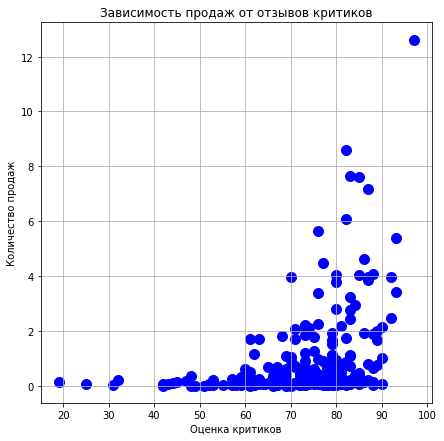

In [35]:
(
    df_actual_period.query('platform == "PS4"')
    .plot.scatter (x = 'critic_score', y = 'sum_sales', s= 100 , c='blue', figsize=(7, 7), grid=True)
)
plt.title('Зависимость продаж от отзывов критиков')
plt.xlabel('Оценка критиков')
plt.ylabel('Количество продаж')
plt.show()
...;

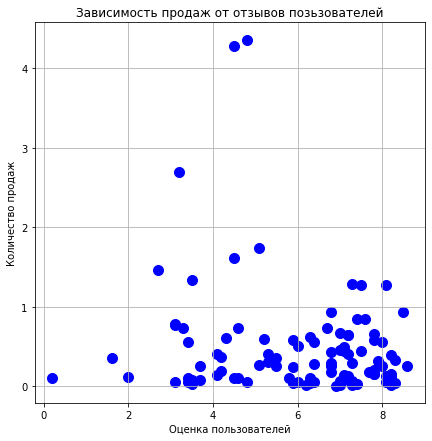

In [36]:
(
    df_actual_period.query('platform == "PS3"')
    .plot.scatter (x = 'user_score', y = 'sum_sales', s= 100 , c='blue', figsize=(7, 7), grid=True)
)
plt.title('Зависимость продаж от отзывов позьзователей')
plt.xlabel('Оценка пользователей')
plt.ylabel('Количество продаж')
plt.show()
...;

In [37]:
df_actual_period.query('platform == "PS4"').corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,sum_sales
year_of_release,1.000000,-0.219443,-0.195176,-0.040969,-0.219129,-0.044226,0.035502,-0.214338
na_sales,-0.219443,1.000000,0.784902,0.491452,0.944903,0.411638,-0.016156,0.928090
eu_sales,-0.195176,0.784902,1.000000,0.472101,0.944380,0.340268,-0.064199,0.958109
jp_sales,-0.040969,0.491452,0.472101,1.000000,0.510433,0.379041,0.179384,0.538524
other_sales,-0.219129,0.944903,0.944380,0.510433,1.000000,0.404645,-0.044166,0.998252
critic_score,-0.044226,0.411638,0.340268,0.379041,0.404645,1.000000,0.546434,0.402661
user_score,0.035502,-0.016156,-0.064199,0.179384,-0.044166,0.546434,1.000000,-0.040132
sum_sales,-0.214338,0.928090,0.958109,0.538524,0.998252,0.402661,-0.040132,1.000000


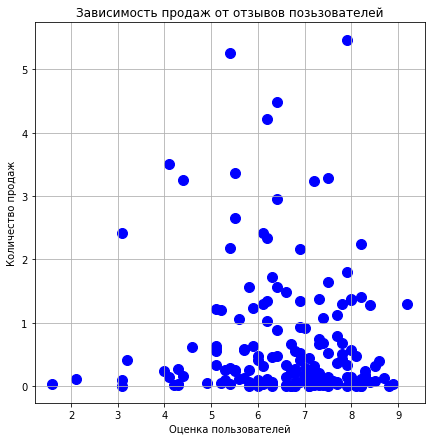

In [38]:
(
    df_actual_period.query('platform == "XOne"')
    .plot.scatter (x = 'user_score', y = 'sum_sales', s= 100 , c='blue', figsize=(7, 7), grid=True)
)
plt.title('Зависимость продаж от отзывов позьзователей')
plt.xlabel('Оценка пользователей')
plt.ylabel('Количество продаж')
plt.show()
...;

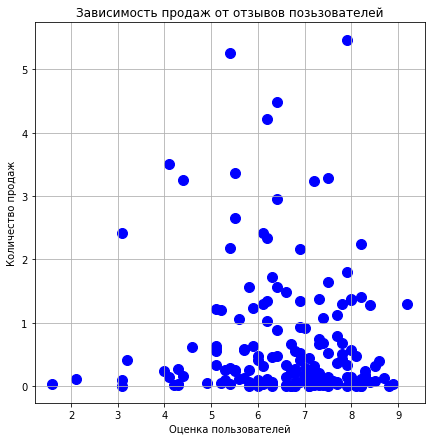

In [39]:
(
    df_actual_period.query('platform == "XOne"')
    .plot.scatter (x = 'user_score', y = 'sum_sales', s= 100 , c='blue', figsize=(7, 7), grid=True)
)
plt.title('Зависимость продаж от отзывов позьзователей')
plt.xlabel('Оценка пользователей')
plt.ylabel('Количество продаж')
plt.show()
...;

In [40]:
df_actual_period.query('platform == "X360"').corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,sum_sales
year_of_release,1.000000,-0.224167,-0.195040,-0.195843,-0.237644,NaN,-0.252575,-0.238375
na_sales,-0.224167,1.000000,0.588317,0.151322,0.978530,0.539778,-0.133585,0.944965
eu_sales,-0.195040,0.588317,1.000000,0.090998,0.737452,0.443965,-0.106952,0.820443
jp_sales,-0.195843,0.151322,0.090998,1.000000,0.154383,0.435430,0.089151,0.148872
other_sales,-0.237644,0.978530,0.737452,0.154383,1.000000,0.544409,-0.137688,0.990365
critic_score,NaN,0.539778,0.443965,0.435430,0.544409,1.000000,0.625309,0.525723
user_score,-0.252575,-0.133585,-0.106952,0.089151,-0.137688,0.625309,1.000000,-0.138445
sum_sales,-0.238375,0.944965,0.820443,0.148872,0.990365,0.525723,-0.138445,1.000000


Данные подтверждены!  
  
  Отзывы критиков важны для покупателей, но далеко не для всех. Часть геймеров следит за индустрией и читает отзывы перед покупкой, а часть ждут новую часть игры или игру, которая сейчас рекламируется, и не смотрят на отзывы.

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Сравнение показателей на нескольких платформах, позволяет набрать вес твоему исследованию, молодец

<div class="alert alert-warning", style="border:solid coral 3px; padding: 20px">
<font size="4", color = "DimGrey"><b>⚠️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Возможно пользователи более критичны к играм, чем критики, но мы не сможем оценить какие действия повлияли на рост продаж в рамках нашего проекта (ограниченность имеющихся данных)
        
    
        
__Достаточно много игр с высокой оценкой критиков и слабой выручкой__
        
Приведу пример ложной корреляции, весьма известный в статистической литературе. Была исследована корреляционная связь между числом аистов, свивших гнезда в южных районах Швеции, и рождаемостью в эти же годы в Швеции. Расчёты, выполненные ради шутки, показали существенную положительную корреляцию между этими явлениями, хотя любому понятно, что это ложная корреляция.

Ещё пример ложной корреляции между приемом на работу новых менеджеров и созданием новых производственных мощностей. Возможно, именно менеджеры являются «причиной» капиталовложений в новые производственные мощности? Или же, наоборот, создание новых производственных мощностей послужило «причиной» приема на работу новых менеджеров?

Например, можно обнаружить сильную положительную связь (корреляцию) между разрушениями, вызванными пожаром, и числом пожарных, тушивших пожар. Следует ли заключить, что пожарные вызывают разрушения? Конечно, наиболее вероятное объяснение этой корреляции состоит в том, что размер пожара (внешняя переменная, которую забыли включить в исследование) оказывает влияние, как на масштаб разрушений, так и на числе привлеченных пожарных (т. е. чем больше пожар, тем большее количество пожарных вызывается на его тушение) .

#### Распределение жанров игр по продажам

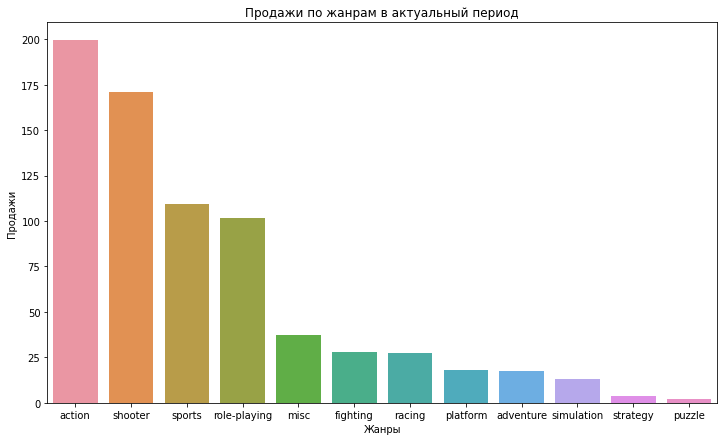

In [41]:
df_genre = df_actual_period.pivot_table(
    index='genre', values='sum_sales', aggfunc='sum').sort_values(by='sum_sales', ascending=False)

plt.figure(figsize=(12,7))
sns.barplot(x=df_genre.index,y=df_genre['sum_sales'])
plt.title('Продажи по жанрам в актуальный период')
plt.xlabel('Жанры')
plt.ylabel('Продажи')
...;

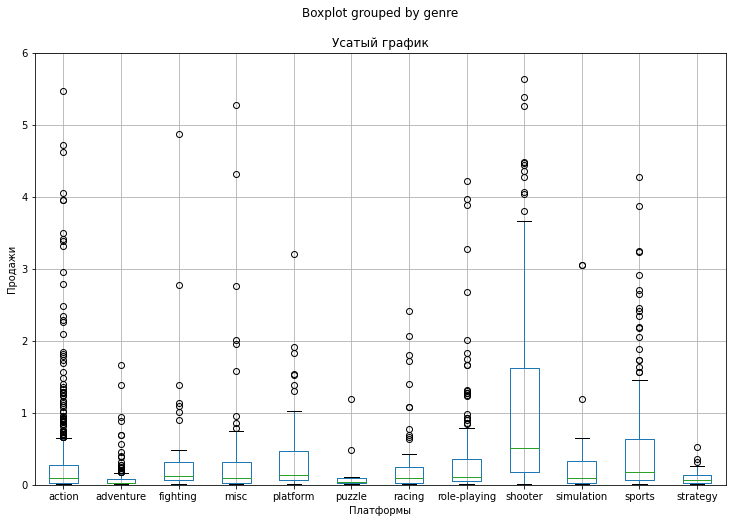

In [42]:
df_actual_period.boxplot(column = ['sum_sales'],by = ['genre'],figsize=(12, 8))
plt.ylim([0, 6])
plt.title('Усатый график')
plt.xlabel('Платформы')
plt.ylabel('Продажи')
plt.show()

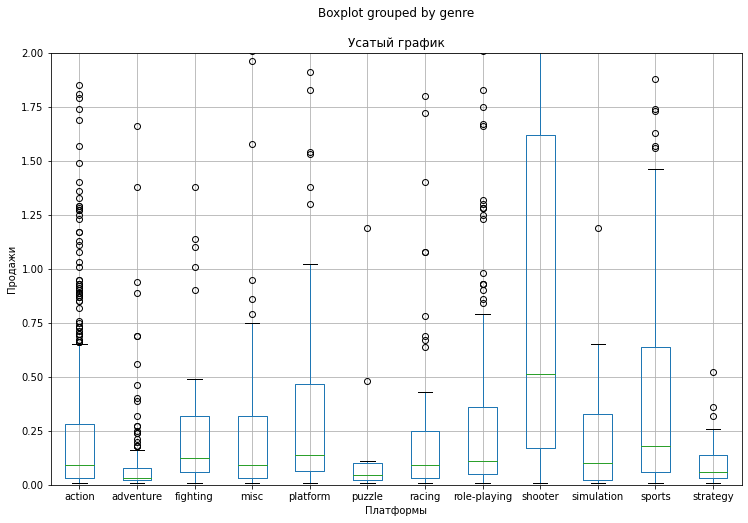

In [43]:
df_actual_period.boxplot(column = ['sum_sales'],by = ['genre'],figsize=(12, 8))
plt.ylim([0, 2])
plt.title('Усатый график')
plt.xlabel('Платформы')
plt.ylabel('Продажи')
plt.show()

Если посмотреть на диаграмму размаха, оказывыется, что жанр Action выбился в топ 1 жанр благодаря "бестселлерам", такой вывод можно сделать посмотрев на количество выбросов (значений выше 75% квантиля) и так же взгянул в медианное значение данного жанра. А жанр Shooter наоборот имеет не так много выбросов выше 75% квантиля, но его медианное значение выше в 5 раз, а 75% квантиль в 40 раз, те игры этого жанра в среднем будут прибыльнее, чем жанра Action, хоть и по общим продажам он проигрывает, такой же вывод можно сделать и про топ 3 жанр Sports, его медианное значение и 75% квантиль намного выше, а выбросов меньше чем у Action, но общее количество продаж ниже. Так же жанр Platform имеет хорошие продажи в средем, хоть и находится на 8 месте общего списка (75% квантиль около 1млн).

<div class="alert alert-da nger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />        
Стоит  увеличить ширину графика, надписи оси Х сливаются

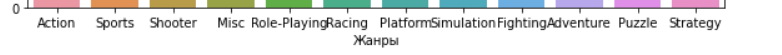        

<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Масштаб увеличен

Самый продоваемые жанры: Action, Sports, Shooter.  
Самые не продаваемые жанры: Simulation, Puzzle, Strategy.  
Action самый обширный жанр игр, включающий в себя большое количество поджанров, поэтому его популярность ясна. Количество игр в данном жанре самое большое 619. В жанре Shooter большое количество online и single-player игр, популярное направление, как на PC так и на консолях. На третьем месте любимые игры консольщиков, это категория Sport. Спортивные симуляторы получили новую жизнь, после распространения консолей, сейчас их большое количество.
Меньше все гопользуются спросом Puzzle, Strategy, но и количество игр выпущенных в рассматриваемый около 54 в двух жанрах суммарно, это нишевые жанры, которые не имеют массового покупателя.  
  
  Данные с высокими и низкими продажами сильно отличаются по количеству игр и количеству продаж.


<div class="alert alert-dan ger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />        
Стоит проанализировать прибыльность жанров на диаграмме размаха, сравнить медианные продажи на каждом жанре и проверить какая из них более стабильна и имеет более длинный ряд успешно продающихся игр
        
График нарисовать __в двух масштабах с выбросами и без__ (чтобы было видно 0.75-квантиль)

<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> График в увеличенном масштабе добавлен, так же вывод по этому графику добавлен в общий вывод по разделу пунктом 7.  
        Так же был поправлен вывод по разделу, в связи с изменением выборки.

<div class="alert alert-da nger">
<font size="4"><b>❌ Комментарий ревьюера в2</b></font>
    <br /> 
    <font size="3", color = "black">
<br />    Диаграммы размаха это ящики с усами, стоит добавить подобные, но по жанрам
        
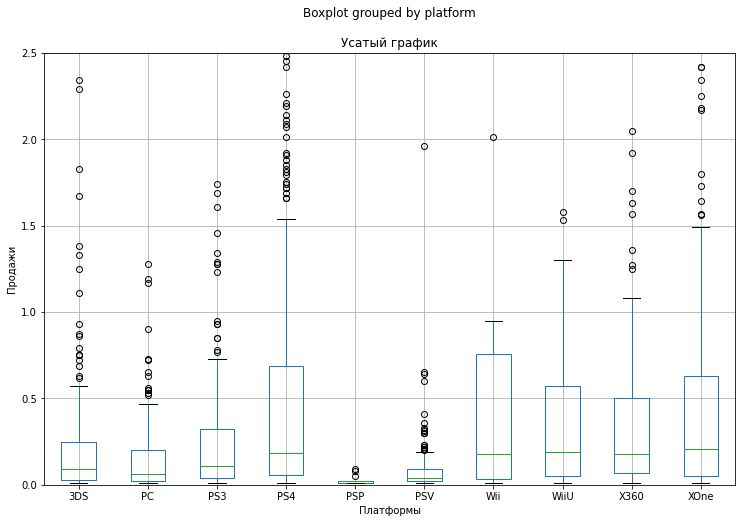        

<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> График и вывод к нему добавлен!

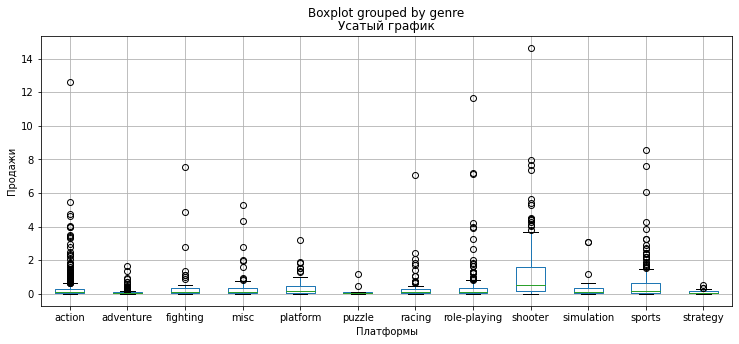

In [44]:
df_actual_period.boxplot(column = ['sum_sales'],by = ['genre'],figsize=(12, 5))
# plt.ylim([0, 6])
plt.title('Усатый график')
plt.xlabel('Платформы')
plt.ylabel('Продажи')
plt.show()

#### Вывод Исследовательский анализ данных

1. Количество игр сильно росло до 2010, далее начался спад, скорее всего связанный с повышение потребностей пользователей и дорогостоящей разраоткой больший тайтлов;  
2. Самые популярные платформы за все время это PS2, X360, PS3;  
3. Средняя жизнь игровой платформы примерно 10 лет, только PC вечен и всегда будет актуален!;  
4. Оценки критиков влияют на продажи, нет прямой зависимости, но видно по графикам, что при высоких оценках, количество продаж увеличивается;  
5. Выявлены самые популярные жанры игр Action, Sports, Shooter и жанры, которые более нишевые Puzzle, Strategy;  
6. Так же были выбраны 2 перспективных консоли для закупок 2017 PS4, XOne.  
7. Если сравнивать платформы по медианному значению продаж, то PS4, XOne, Wii, WiiU игры продаются большим тиражем стабильнее других, а медианные значения PSP, PSV, PC совсем низкие.

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Промежуточные выводы отлично помогают составить итоговый и не упустить детали на проекте, молодец
        
стоит поправить нюансы

### Портреты пользователей каждого региона

#### Самые популярные платформы в каждом регионе

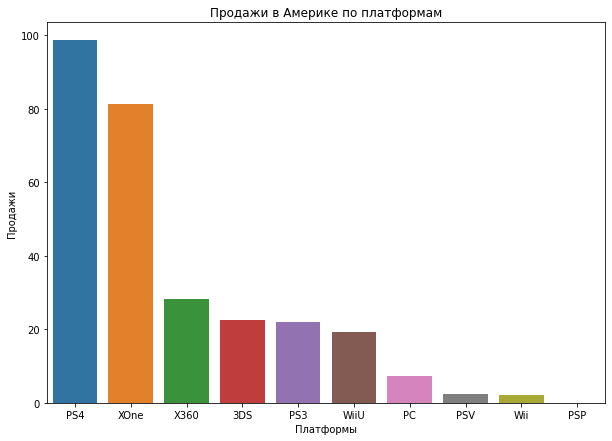

In [45]:
df_platform_na = (
    df_actual_period.pivot_table(index='platform', values='na_sales', aggfunc='sum')
    .sort_values(by='na_sales', ascending=False)
)
plt.figure(figsize=(10,7))
sns.barplot(x=df_platform_na.index,y=df_platform_na['na_sales'])
plt.title('Продажи в Америке по платформам')
plt.xlabel('Платформы')
plt.ylabel('Продажи')
...;

In [46]:
df_platform_na.sort_values(by='na_sales', ascending=False).head()

,na_sales
platform,
PS4,98.61
XOne,81.27
X360,28.30
3DS,22.64
PS3,22.05


In [47]:
(df_platform_na['na_sales'] / df_platform['sum_sales']).sort_values(ascending=False)

platform
X360    0.586893
XOne    0.579011
WiiU    0.450442
Wii     0.410256
PS4     0.342218
PS3     0.323409
PC      0.267283
3DS     0.261191
PSV     0.112500
PSP     0.000000
dtype: float64

Самые продоваемые игры для платформ PS4, Xone, X360, 3DS, PS3.  
X360 и XOne это детище компании Microsoft, как я уже говорил ранее, это американская компания, поэтому на домашнем рынке её продажи относительно к продажам во всем мире занимает 59% и 58% соответсвенно.  
Продажи PS4 34%, 3DS 26%, PS3 32%.  

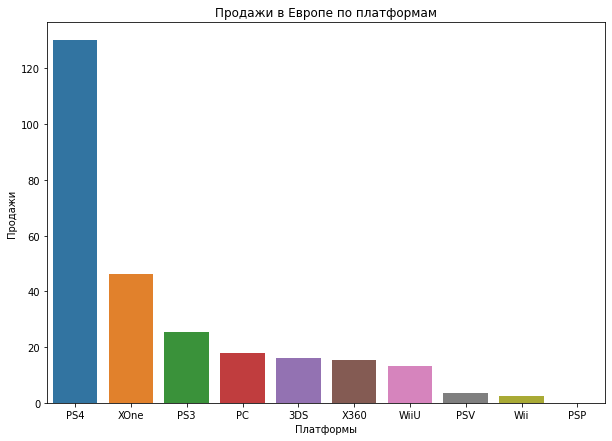

In [48]:
df_platform_eu = (
    df_actual_period.pivot_table(index='platform', values='eu_sales', aggfunc='sum')
    .sort_values(by='eu_sales', ascending=False)
)
plt.figure(figsize=(10,7))
sns.barplot(x=df_platform_eu.index,y=df_platform_eu['eu_sales'])
plt.title('Продажи в Европе по платформам')
plt.xlabel('Платформы')
plt.ylabel('Продажи')
...;

<div class="alert alert-warning", style="border:solid coral 3px; padding: 20px">
<font size="4", color = "DimGrey"><b>⚠️ Комментарий ревьюера</b></font>
    <br />  
    <font size="3", color = "black">
<br /> Стоит сортировать значения для графиков 

<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Все графики раздела отсортированы!

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера в2</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Отлично, молодец

In [49]:
df_platform_eu.sort_values(by='eu_sales', ascending=False).head()

,eu_sales
platform,
PS4,130.04
XOne,46.25
PS3,25.54
PC,17.97
3DS,16.12


In [50]:
(df_platform_eu['eu_sales'] / df_platform['sum_sales']).sort_values(ascending=False)

platform
PC      0.664325
Wii     0.510848
PS4     0.451293
PS3     0.374597
XOne    0.329510
X360    0.321236
WiiU    0.305956
3DS     0.185971
PSV     0.157589
PSP     0.000000
dtype: float64

Самые продоваемые игры для платформ PS4, XOne, PC, 3DS, PS4.
В Европе PS4 любят больше чем XOne продажи приставко отличаются в 3 раза. Так же виден большой интерес к играм на PC 66% всего мирового рынка покупок.  
Продажи PS4 45%, PS3 37%, XOne 33%, 3DS 19%.

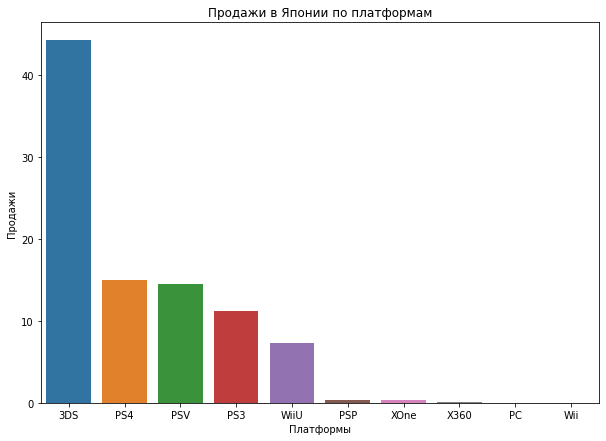

In [51]:
df_platform_jp = (
    df_actual_period.pivot_table(index='platform', values='jp_sales', aggfunc='sum')
    .sort_values(by='jp_sales', ascending=False)
)
plt.figure(figsize=(10,7))
sns.barplot(x=df_platform_jp.index,y=df_platform_jp['jp_sales'])
plt.title('Продажи в Японии по платформам')
plt.xlabel('Платформы')
plt.ylabel('Продажи')
...;

In [52]:
df_platform_jp.sort_values(by='jp_sales', ascending=False).head()

,jp_sales
platform,
3DS,44.24
PS4,15.02
PSV,14.54
PS3,11.22
WiiU,7.31


In [53]:
(df_platform_jp['jp_sales'] / df_platform['sum_sales']).sort_values(ascending=False)

platform
PSP     1.000000
PSV     0.649107
3DS     0.510383
WiiU    0.170079
PS3     0.164564
PS4     0.052126
XOne    0.002280
X360    0.001659
PC      0.000000
Wii     0.000000
dtype: float64

Самые продоваемые игры для платформ 3DS, PS3, PS4, PSV, WiiU.  
В Японии люди единственные в мире покупают игры для PSP(старая версия консоли PSV) 100%, так же весь топ платформ для игр состоит из приставок созданных японскими компаниями.
Продажи PSV 65%, 3DS 51%, PS4 5%, PS3 16%.

<div class="alert alert-warning", style="border:solid coral 3px; padding: 20px">
<font size="4", color = "DimGrey"><b>⚠️  Комментарий ревьюера в2</b></font>
    <br /> 
    <font size="3", color = "black">
<br />  При оформлении общего заголовка, мы сможем избавиться от служебной информации
        
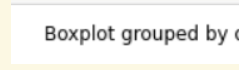      
        
        
В статье и на рисунке представлен код, который поможет исправить общий заголовок
        
[Визуализация](https://dfedorov.spb.ru/pandas/%D0%AD%D1%84%D1%84%D0%B5%D0%BA%D1%82%D0%B8%D0%B2%D0%BD%D0%BE%D0%B5%20%D0%B8%D1%81%D0%BF%D0%BE%D0%BB%D1%8C%D0%B7%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5%20Matplotlib.html)        
        
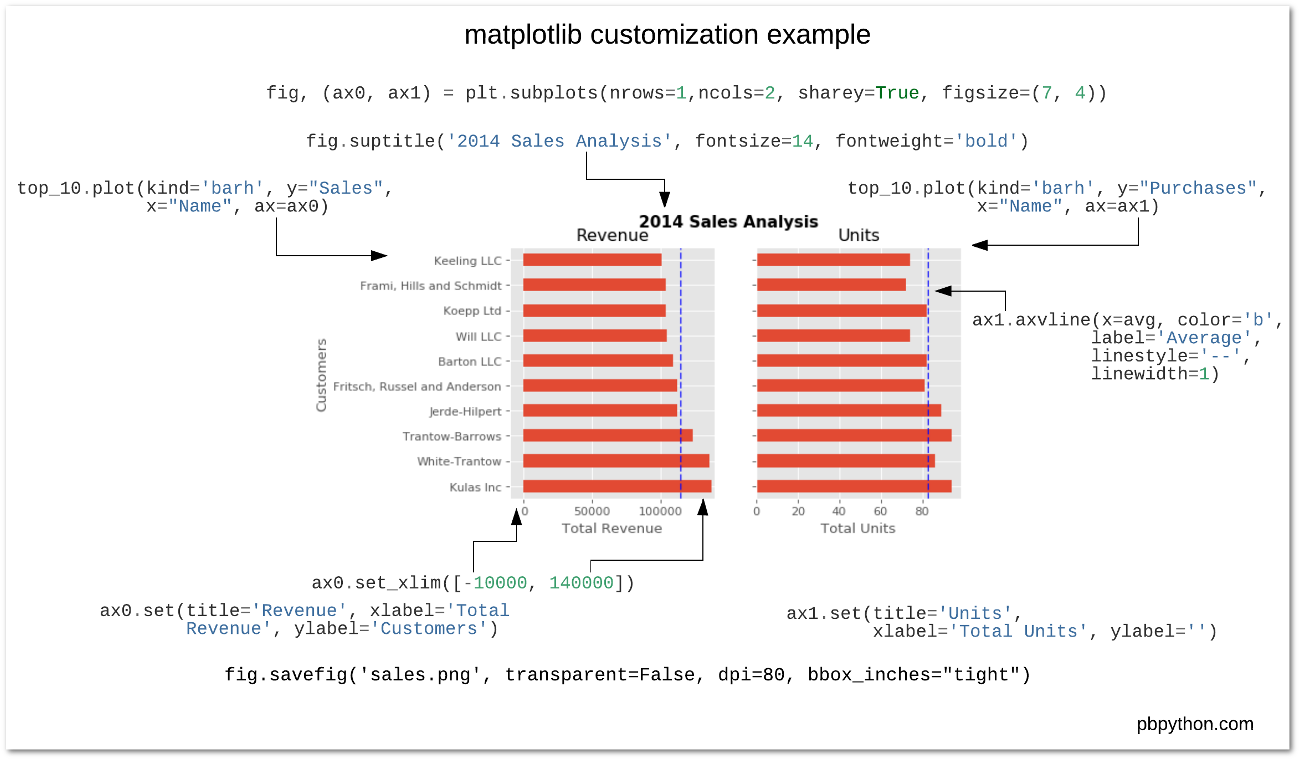        

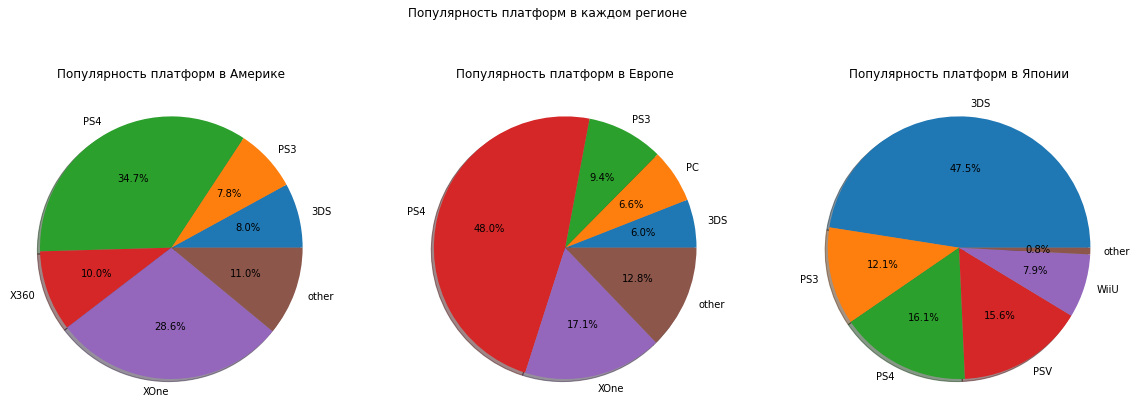

In [54]:
df_pit = df_actual_period.drop(columns=['other_sales', 'critic_score', 'user_score', 'sum_sales', 'year_of_release'])
df_pit_na = df_pit.replace({'platform':{'PSP':'other', 'Wii':'other', 'WiiU':'other',  'PSV':'other',  'PC':'other'}})
df_pit_eu = df_pit.replace({'platform':{'PSP':'other', 'Wii':'other', 'WiiU':'other',  'PSV':'other',  'X360':'other'}})
df_pit_jp = df_pit.replace({'platform':{'PSP':'other', 'Wii':'other', 'X360':'other',  'XOne':'other',  'PC':'other'}})
df_pit_na = df_pit_na.groupby(['platform']).sum()
df_pit_eu = df_pit_eu.groupby(['platform']).sum()
df_pit_jp = df_pit_jp.groupby(['platform']).sum()
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 7))
ax1 = axs[0].pie(df_pit_na['na_sales'], autopct='%1.1f%%', radius=1, shadow = True, labels=df_pit_na.index)
ax2 = axs[1].pie(df_pit_eu['eu_sales'], autopct='%1.1f%%', radius=1, shadow = True, labels=df_pit_eu.index)
ax3 = axs[2].pie(df_pit_jp['jp_sales'], autopct='%1.1f%%', radius=1, shadow = True, labels=df_pit_jp.index)
fig.suptitle('Популярность платформ в каждом регионе')
axs[0].set_title('Популярность платформ в Америке')
axs[1].set_title('Популярность платформ в Европе')
axs[2].set_title('Популярность платформ в Японии')
...;

<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Тут вообще никак, потратил 5 часов на изучение тысячи сайтов, помоги, пожалуйста, как это сделать, я не могу добавить title к графикам, не могу понять как title общий добавить, labels вообще темный лесь, что мне отдельный список создавать для кажого региона под labels?!  
        

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера в2</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Пример добавил

<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Спасибо боольшое, оказалось все так просто, доделал графики, полуились! 
        

<div style>
<font size="4"><b></b></font>
<font size="5", color = "black">
😉🤝🤝🤝🤝

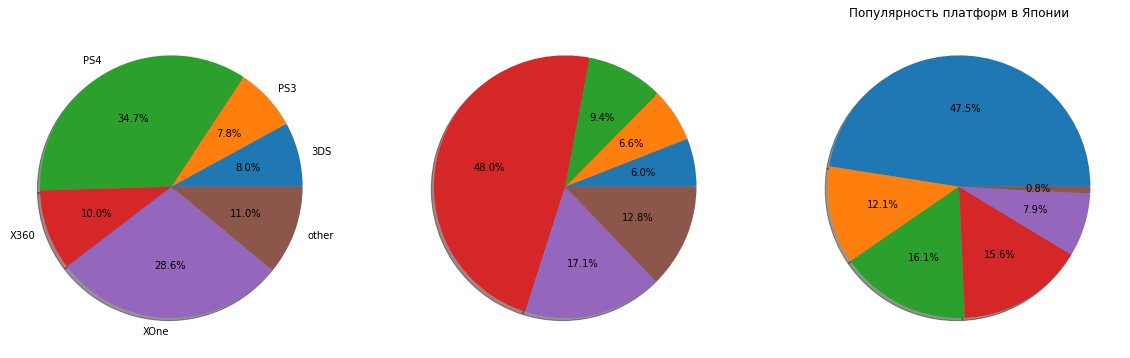

In [55]:
df_pit = df_actual_period.drop(columns=['other_sales', 'critic_score', 'user_score', 'sum_sales', 'year_of_release'])
df_pit_na = df_pit.replace({'platform':{'PSP':'other', 'Wii':'other', 'WiiU':'other',  'PSV':'other',  'PC':'other'}})
df_pit_eu = df_pit.replace({'platform':{'PSP':'other', 'Wii':'other', 'WiiU':'other',  'PSV':'other',  'X360':'other'}})
df_pit_jp = df_pit.replace({'platform':{'PSP':'other', 'Wii':'other', 'X360':'other',  'XOne':'other',  'PC':'other'}})
df_pit_na = df_pit_na.groupby(['platform']).sum()
df_pit_eu = df_pit_eu.groupby(['platform']).sum()
df_pit_jp = df_pit_jp.groupby(['platform']).sum()
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 30))
ax1 = axs[0].pie(df_pit_na['na_sales'], autopct='%1.1f%%', radius=1, shadow = True, labels=df_pit_na.index)
ax2 = axs[1].pie(df_pit_eu['eu_sales'], autopct='%1.1f%%', radius=1, shadow = True)
plt.title('Популярность платформ в Японии')
ax3 = axs[2].pie(df_pit_jp['jp_sales'], autopct='%1.1f%%', radius=1, shadow = True)
...;

##### Вывод популярные платформы в разных регионах

На каждом рынке свои лидеры по продажам среди платформ.  
Японцы предпочитают платформы отечественные, используют как старые версии, так и новые, PSP вообще занимает рынок всего мира только японцами.  
Европейцы покупают чаще всех игры для старого доброго PC, но еще новые поколения платформ чаще покупают европейцы, и эти платформы стационарные.  
Рынок Америки самый активный в игровой индустрии, доли продаж игр на все консоли крайне высокий, американцы играют во все игры и на всех платформах, в самых популярных приставках приставки X360 и XOne, созданные американской компанией Microsoft.

<div class="alert alert-da nger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Портреты клиентов нарисованы, молодец, значительное влияние на портрет оказывает период с 2006 г. ..., можем совершить ошибку при формировании рекомендации маркетологам
        
Стоит оформить графики раздела TOП-5:

+ выбрать актуальный период;
+ для каждого ТОП-5 - построить 3 графика рядом с помощью subplots, оптимальнее сравнивать три региона по каждому виду портрета вместе;
+ оформить "двухуровневый заголовок" - и у всех трех графиков вместе, и у каждого из трех по отдельности;
+ при анализе платформ и жанров стоит все, что не вошло в ТОП-5, объединять в категорию "другие" - так картина анализа будет более полной

        
Если столкнешься с трудностью выполнения данного пункта — присылай код, который не получился и вопрос, подумаем вместе
        
https://proproprogs.ru/modules/matplotlib-otobrazhenie-neskolkih-koordinatnyh-osey-v-odnom-okne
        
    

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> пример графиков
        
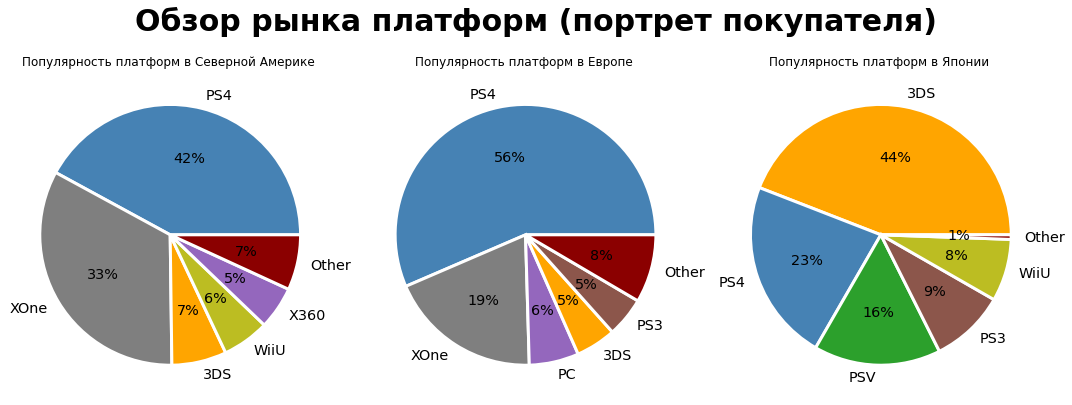        
        

__Если столкнешься с трудностью выполнения данного пункта — присылай код, который не получился и вопрос, подумаем вместе__


#### Самые популярные жанры в каждом регионе

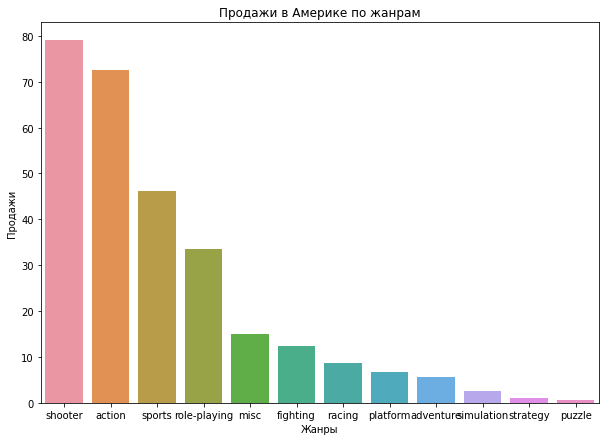

In [56]:
df_genre_na = (
    df_actual_period.pivot_table(index='genre', values='na_sales', aggfunc='sum')
    .sort_values(by='na_sales', ascending=False)
)
plt.figure(figsize=(10,7))
sns.barplot(x=df_genre_na.index,y=df_genre_na['na_sales'])
plt.title('Продажи в Америке по жанрам')
plt.xlabel('Жанры')
plt.ylabel('Продажи')
...;

In [57]:
df_genre_na.sort_values(by='na_sales', ascending=False).head()

,na_sales
genre,
shooter,79.02
action,72.53
sports,46.13
role-playing,33.47
misc,15.05


Самые популярные жанры Shooter, Action, Sports, Role_playing, Misc.  
Топ 3 категории в Америке, такие же как топ 3 в мировых продажах.

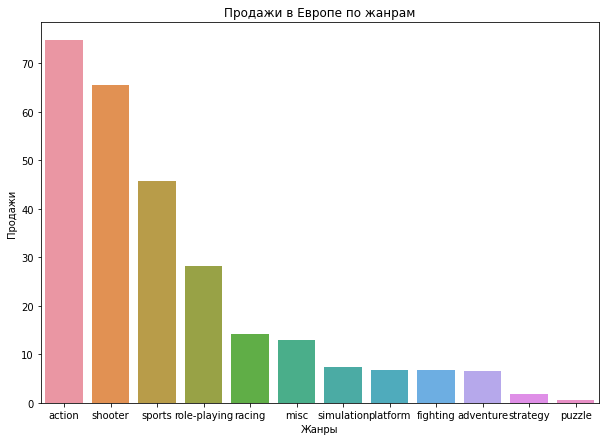

In [58]:
df_genre_eu = (
    df_actual_period.pivot_table(index='genre', values='eu_sales', aggfunc='sum')
    .sort_values(by='eu_sales', ascending=False)
)
plt.figure(figsize=(10,7))
sns.barplot(x=df_genre_eu.index,y=df_genre_eu['eu_sales'])
plt.title('Продажи в Европе по жанрам')
plt.xlabel('Жанры')
plt.ylabel('Продажи')
...;

In [59]:
df_genre_eu.sort_values(by='eu_sales', ascending=False).head()

,eu_sales
genre,
action,74.68
shooter,65.52
sports,45.73
role-playing,28.17
racing,14.13


Самые популярные жанры Action, Sports, Shooter, Role-Playing, Racing.  
Картина такая же как и в Америке, за исключение пятого места в рейтинге. На пятом месте в Европе гонки, возможно это связано с количеством покупок игр на PC, на нем пользователям удобнее играть в гонки.

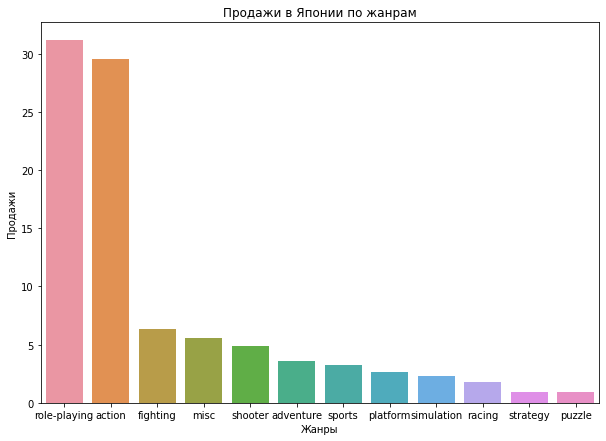

In [60]:
df_genre_jp = (
    df_actual_period.pivot_table(index='genre', values='jp_sales', aggfunc='sum')
    .sort_values(by='jp_sales', ascending=False)
)
plt.figure(figsize=(10,7))
sns.barplot(x=df_genre_jp.index,y=df_genre_jp['jp_sales'])
plt.title('Продажи в Японии по жанрам')
plt.xlabel('Жанры')
plt.ylabel('Продажи')
...;

In [61]:
df_genre_jp.sort_values(by='jp_sales', ascending=False).head()

,jp_sales
genre,
role-playing,31.16
action,29.58
fighting,6.37
misc,5.61
shooter,4.87


Самые популярные жанры Role-Playing, Action, Fighting, Misc, Shooter.  
В Японии так же присутсвуют три жанра из топов Европы и Америки Action, Misc, Sports, Shooter, Role-Playing.  
Role-Playing и Action сильно выбиваются из общего графика, видно, что эти два жанра крайне популярны.

##### Вывод популярные жанры в разных регионах

Популярные жанры имеют совпадения в каждом регионе.  
Покупательская способность жителей Европы и Америки примерно одинакова, количество продаж Японии относительно двух предыдущих на 60% меньше по топ 5 жанрам.   
Жанр Action самый популярный, если рассматривать среднее место каждого жанра в рейтинге регионов.

#### Влияние рейтинга ESRB на продажи в регионах

In [62]:
df_rating_jp = df_actual_period.pivot_table(index='rating', values='jp_sales', aggfunc='sum')
df_rating_na = df_actual_period.pivot_table(index='rating', values='na_sales', aggfunc='sum')
df_rating_eu = df_actual_period.pivot_table(index='rating', values='eu_sales', aggfunc='sum')

In [63]:
df_rating_jp.sort_values(by='jp_sales', ascending=False)

,jp_sales
rating,
T,14.78
E,8.94
M,8.01
E10+,4.46


In [64]:
df_rating_na.sort_values(by='na_sales', ascending=False)

,na_sales
rating,
M,96.42
E,50.74
T,38.95
E10+,33.23


In [65]:
df_rating_eu.sort_values(by='eu_sales', ascending=False)

,eu_sales
rating,
M,93.44
E,58.06
T,34.07
E10+,26.16


##### Вывод о влияние рейтинга ESRB

Как видим из распределений, распределение продаж по каждому рейтенгу идентично.  
Те рейтинг Entertainment Software Rating Board влияет на продажи. Чтобы разобраться, что значит каждое значение рейтинга, раскроем аббревиатуры.  
EC - Для детей младшего возраста. Подходит для детей от 3 лет, неприемлемое содержание отсутствует.  
E - Подходит для всех возрастных категорий. Игра не должна содержать звуков или изображений, которые могут напугать маленьких детей. Не должна использоваться ненормативная лексика.  
E10+ - Подходит для лиц старше 10 лет. Игра может содержать умеренные формы насилия, а некоторые сцены могут пугать детей.  
T - Подходит для лиц старше 13 лет. Игра может содержать более реалистичные и натуралистические сцены насилия.  
M - Подходит для лиц старше 17 лет. Этот рейтинг используется, когда насилие становится реалистичным и похожим на реальную жизнь. Также может присутствовать ненормативная лексика, употребление табака, алкоголя или запрещенных наркотиков.  
AO - Подходит для взрослых старше 18 лет. Классификация «для взрослых» используется, когда в игре присутствует крайний уровень насилия и немотивированного убийства. Также может присутствовать романтизация наркотиков, азартных игр и сексуальной активности.  
RP - Категория ещё не присвоена. Играм с категорией RP еще не присвоен окончательный рейтинг ESRB.  
Самые продоваемые оказываются игры для взрослых, кроме Японии там самые популярные игры для лиц старше 13.  

#### Вывод по портрету пользователя каждого региона

Американец готов и хочет покупать больше игр на любые платформы, он больше погружен в игровую индустрию, чем жители Японии или Европы. Любимые платформы жителя Америки X360, Wii, PS3, DS, PS2, любимые жанры Action, Sports, Shooter, Misc, Role_playing. По рейтингу ESRB отличий от других регионов нет.  
  
  Европеец так же заинтересован в индустрии игр, но меньше на 40%, это может быть связано с тем, что больше всего пользователей мира PC именно в Европе, а стоимость игр на PC ниже, чем стоимость игр на приставки. Любимые платформы жителя Европы PS3, X360, Wii, DS, PS4, любимые жанры такиже как и у жителя Америки Action, Sports, Shooter, Misc, Racing, кроме гонок, связываю это так же с большим количеством пользователей PC. По рейтингу ESRB отличий от других регионов нет.  
  
  Японец самый необычный покупатель в индустрии игр, если за обычного рассматривать жителя Америки и Европы.  Любимые жанры и платформы очень сильно отличаются от других регионов, жанры отличаются из-за используемых протативных платформ. Играют японцы в большинсве на консолях, произведенных в Японии. Любимые платформы DS, 3DS, PS3, PSP, Wii, любимые жанры Role-Playing, Action, Misc, Sports, Platform. По рейтингу ESRB отличий от других регионов нет. 
  

<div class="alert alert-warning", style="border:solid coral 3px; padding: 20px">
<font size="4", color = "DimGrey"><b>⚠️ Комментарий ревьюера</b></font>
    <br />  
    <font size="3", color = "black">
<br />
При твоем способе подсчета игры без рейтинга оказываются полностью исключенными из анализа. Но продажи именно этих игр могут указать на ключевое различие в регионах
        
Стоит поработать со столбцом рейтингов, заменить пропуски, посмотреть на частотность использования всех категорий рейтинга

### Вывод по проекту

В ходе проекта были изучены данные интернет-магазине «Стримчик».  
1. Изучив общую информацию о данных, были выявленные не верные типы данных в столбцах Year_of_Release, User_Score, Critic_Score, так же найдены пропущенные значения в столбцах Critic_Score, User_Score, Rating, Year_of_Release.  
2. В результате предобработки данных были переименованы столбцы, все наименования были приведены к нижнему регистру, типы данных в столбцах Year_of_Release, User_Score, Critic_Score были заменены на нужные, так же значения tbd в столбце User_Score заменено на пропуски, потому что по своей сути tbd это и есть пропуски. Так же были удалены строки с пропусками в столбцах Year_of_Release и Name, количество удаленных данных 1.6% от всех данных, что является допустимым значением. Данные проверенные на дубликаты в столбцах, которые являются категорийными значениями.   
3. В результате исследовательского анализа было рассмотрено распределение продаж по всему данным и распределение продаж по платформам, так же по всем данным. В ходе этого исследования стало ясно, что для анализа закупок на 2017 год, все данные не будут актуальны и нужны, поэтому был выбран актуальный период времени для дальнейшего исследования. Так же было найдено средняя время жизни платформы 10 лет. Лидирующие по продажам PS4, XOne, 3DS, PS3, X360, а потенциально прибыльные это PS4, XOne т.к это новые платформы, которые только на середине своей жизни, но к закупкам на 2017 год так же нужно рассмотреть PC из-за стабильности платформы на протяжении долгих лет,  3DS так как её продажи все еще большие, люди могли е.Так при при работе с жанрамы были выявленны самые прибыльные Action, Sports, Shooter и самые не прибыльные жанры: Adventure, Puzzle, Strategy.  
4. Были составлены портреты пользователей каждого региона, игры каких платформ они больше покупают или каких жанров они больше покупают. У жителей Америки самый большой спрос на игры любых жанров и платформ. Любимые платформы PS4, XOne, 3DS, PS3, X360, любимые жанры Shooter, Action, Sports, Role_playing, Misc. Жители Европы являются пользователями PC 65% из всей выборки, игры на PC стоят дешевле чем на консоли, поэтому общая сумма продаж не такая большая, так же возможно, что пользователи PC покупают игры на больших платформах как Steam или скачивают с torrent. Любимые платформы PS4, XOne, PC, 3DS, PS4, любимые жанры Action, Sports, Shooter, Role-Playing, Racing. Жителя Японии самые своеобразные, пользуются в большинстве платформами созданными японскими компаниями, поддерживают отечественного производителя, количестро продаж очень низкое, если сравнивать с Америкой. Любимые платформы 3DS, PS3, PS4, PSV, WiiU, любимые жанры Role-Playing, Action, Fighting, Misc, Shooter.




<div class="alert alert-dan ger">
<font size="4"><b>❌ Комментарий ревьюера в2</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Стоит дополнить перечень перспективных платформ

        а потенциально прибыльные это PS4, XOne т.к это новые платформы, которые только на середине своей жизни. 
        
даже  на падающих продажах можно заработать, когда объем составляет около 15-20 млн. копий, как например с 3DS
        
30-тилетняя история персональных компьютеров говорит, что игры для PC можно включить в рекомендацию
        


<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Рекомендации к закупкам добавлены

<div class="alert alert-da nger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Итоговый вывод технически составлен грамотно
        
стоит перепроверить результаты после определения актуального периода и исправления всех комментариев, можно обновить названия самых актуальных платформ, жанров и рейтингов, какую долю они занимают на исследуемых рынках
         

<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Вывод раздела исправлен.

<div class="alert alert-success">
<font size="5", color= "seagreen"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />   
Ты выполнил практически все пункты проекта, молодец! Проведен значительный объем исследования 
        
Критические ❌ комментарии связаны с неточностями: 

 + добавить название
 + обработать пропуски и сократить категории в рейтингах ESRB — на твое усмотрение
 + выполнить проверку на дублирование записей
 + самое важное — переопределить актуальный период
 + поправить диаграммы в исследовании зависимости по платформам конкурентам (от оценок критиков и пользователей)        
 + оценить прибыльность жанров на диаграмме размаха
 + перестроить графики в ТОП-5
 + перепроверить промежуточные и итоговый выводы после всех исправлений

Стоит обратить внимание на ⚠️ комментарии...        
        
Если будут вопросы про мои комментарии - задавай, если какой-то формат взаимодействия не устраивает или есть какие-то другие пожелания - пиши :)

<div class="alert alert-success">
    <font size="5", color= "seagreen"><b>Жду твой проект и твои комментарии 🤝</b></font><br />

<div style="border:solid steelblue 3px; padding: 20px">
<font size="4">🍕<b> Комментарий ревьюера</b></font>
<br /> 
<font size="3", color = "black">
<br />
Может пригодиться  
    
   
[Визуализация](https://dfedorov.spb.ru/pandas/%D0%AD%D1%84%D1%84%D0%B5%D0%BA%D1%82%D0%B8%D0%B2%D0%BD%D0%BE%D0%B5%20%D0%B8%D1%81%D0%BF%D0%BE%D0%BB%D1%8C%D0%B7%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5%20Matplotlib.html)


[Искусство статистики](https://www.mann-ivanov-ferber.ru/books/iskusstvo-statistiki/)
        
[Постер «Графики, которые убеждают всех»](https://www.notion.so/6c5ae8ceb8b5411e907c93c9b5e6a44e)        
        
        
В помощь — как реализовать интерактивный план проекта вручную (для собственных проектов), смотри по <a href="https://stackoverflow.com/questions/49535664/how-to-hyperlink-in-a-jupyter-notebook/49717704">ссылке</a>
    
пара ссылок и по разделам проекта можно будет переходить без пролистывания всего кода, особенно актуально на проектах длина которых >  10 страниц (и там где не установлен плагин TOC)   
    
Плюс    
    
    
[Подборка статей о работе с библиотеками для анализа данных на языке Python](https://dfedorov.spb.ru/pandas/)    

### Бонус

In [66]:
data_games = pd.read_csv('/datasets/games.csv')

In [67]:
data_games.columns = map(str.lower, data_games.columns)

In [68]:
data_games = data_games.dropna(subset = ['year_of_release', 'name', 'genre'])

In [69]:
data_games['user_score'] = data_games['user_score'].replace('tbd', np.nan).astype('float')

In [70]:
data_games['rating'] = data_games['rating'].fillna('unknown')

In [71]:
data_games['total_sales'] = data_games[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [72]:
# check
# круги + категория другие

# функция не работает на версии библиотеки pandas = 2.0 (метод .append устарел)

def graph (df, year, region, name, axes):
    
    df = df.query('year_of_release >= @year')
    
    sales = df.pivot_table(index='platform', 
                           values=region, 
                           aggfunc='sum').nlargest(5, region)
    
    sales = sales.reset_index()
    
    sales = (
            sales.append({'platform': 'Other', region: df[region].sum() 
                       - sales[region].sum()}, ignore_index= True)
         )
    
    
    sales.columns = ['platform', 'sales']
      
# Цветовая гамма не подбиралась специально под платформы, кому-что попадется, 😉      
      
    labels_c=sales.platform
    colours = {'Wii':'C60', 'NES':'C1', 'GB':'C2', 'DS':'C3', 'X360':'C4', 
    'PS3':'C5', 'PS2':'C6', 'SNES':'C7', 'GBA':'C8',
               'PS4':'lightsteelblue', '3DS':'orange', 
               'N64':'C11', 'PS':'C12', 'XB':'C13', 'PC':'Fuchsia', '2600':'C15', 'PSP':'C48', 
               'XOne':'LimeGreen',
               'WiiU':'C18', 'GC':'C19', 'GEN':'C20', 'DC':'C21', 'PSV':'C22', 
               'SAT':'C23', 'SCD':'C24', 'WS':'C25', 'NG':'C26', 
               'TG16':'C27', '3DO':'C28', 'GG':'C29', 'PCFX':'C30', 'Other':'darkred'}
   
    sales.plot(kind='pie',
               y="sales",
               
               autopct='%1.0f%%',
               wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
               textprops={'size': 'x-large'}, 
               labels= labels_c,
               colors=[colours[key] for key in labels_c],
               legend=False, 
               title = f"Популярность платформ в {name} ", 
               ax = axes).set(ylabel='')
    
    plt.tight_layout()

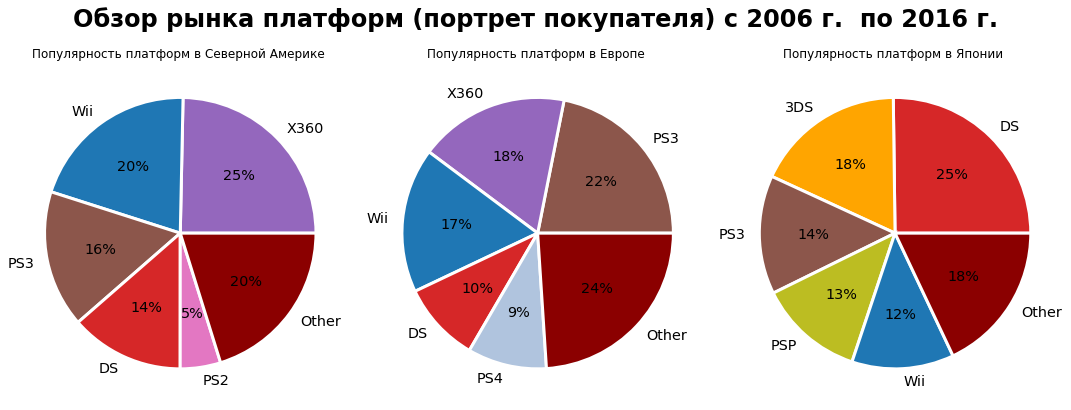

In [73]:
# check
# круги в ряд

x_year = 2006 

fig, axes = plt.subplots(1, 3, figsize = (15,6))
fig.suptitle(f'Обзор рынка платформ (портрет покупателя) с {x_year} г.  по 2016 г.', fontsize = 24, fontweight='bold')

graph(data_games, x_year, 'na_sales', 'Северной Америке', axes[0])
graph(data_games, x_year,'eu_sales', 'Европе', axes[1])
graph(data_games, x_year, 'jp_sales', 'Японии', axes[2])

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера в3</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Оптимальный период для исследования 2014-2016 гг., т.к. данные за 2016 г. неполные

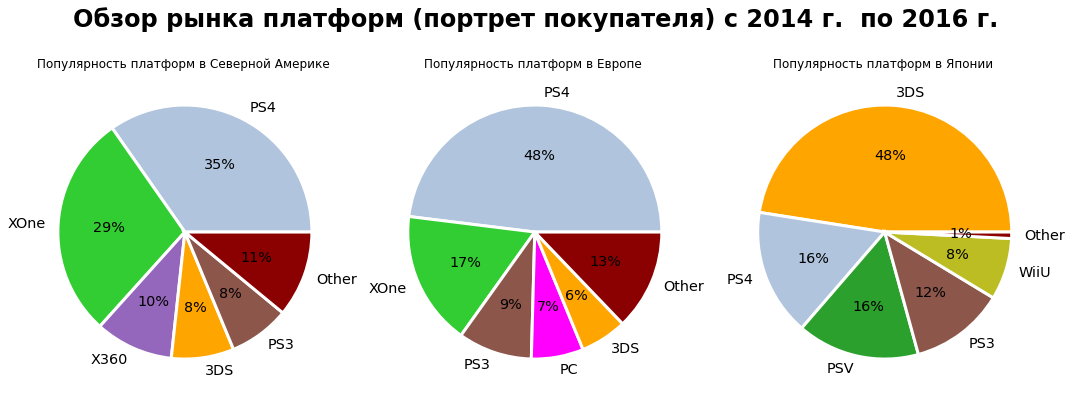

In [74]:
# check
# круги в ряд

x_year = 2014

fig, axes = plt.subplots(1, 3, figsize = (15,6))
fig.suptitle(f'Обзор рынка платформ (портрет покупателя) с {x_year} г.  по 2016 г.', fontsize = 24, fontweight='bold')

graph(data_games, x_year, 'na_sales', 'Северной Америке', axes[0])
graph(data_games, x_year,'eu_sales', 'Европе', axes[1])
graph(data_games, x_year, 'jp_sales', 'Японии', axes[2])

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера в3</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> 2015 год взят для акцентирования на изменении доли в продажах современных платформ

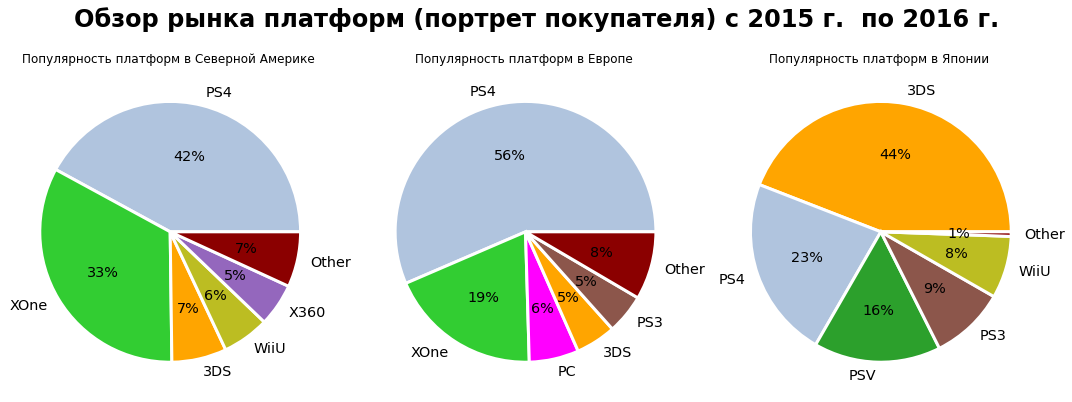

In [75]:
# check
# круги в ряд

x_year = 2015

fig, axes = plt.subplots(1, 3, figsize = (15,6))
fig.suptitle(f'Обзор рынка платформ (портрет покупателя) с {x_year} г.  по 2016 г.', fontsize = 24, fontweight='bold')

graph(data_games, x_year, 'na_sales', 'Северной Америке', axes[0])
graph(data_games, x_year,'eu_sales', 'Европе', axes[1])
graph(data_games, x_year, 'jp_sales', 'Японии', axes[2])